# Execute the code below

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.artist as art
import matplotlib.dates as mdates
import pandas as pd
import numpy as np



In [ ]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# You have now a DataFrame with lots of weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

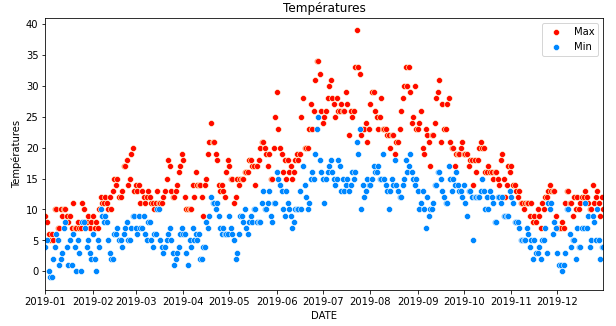


In [ ]:
# Data didn't have "DATE" Series in datetime form:
df_weather["DATE"] = pd.to_datetime(df_weather["DATE"])

# And I'll melt the dataframe, so I can colorize via hue
df_minmax = df_weather.melt(id_vars="DATE", value_vars=["MAX_TEMPERATURE_C", "MIN_TEMPERATURE_C"], value_name="Temperatures")
#df_minmax.loc[df_minmax["variable"]=="MAX_TEMPERATURE_C", "variable"] = "Max"
#df_minmax.loc[df_minmax["variable"]=="MIN_TEMPERATURE_C", "variable"] = "Min"

df_minmax

#df_minmax.rename(columns={"MAX_TEMPERATURE_C": "Max", "MIN_TEMPERATURE_C": "Min"})

,DATE,variable,Temperatures
0,2019-01-01,MAX_TEMPERATURE_C,9
1,2019-01-02,MAX_TEMPERATURE_C,8
2,2019-01-03,MAX_TEMPERATURE_C,6
3,2019-01-04,MAX_TEMPERATURE_C,5
4,2019-01-05,MAX_TEMPERATURE_C,6
...,...,...,...
725,2019-12-27,MIN_TEMPERATURE_C,10
726,2019-12-28,MIN_TEMPERATURE_C,5
727,2019-12-29,MIN_TEMPERATURE_C,2
728,2019-12-30,MIN_TEMPERATURE_C,4


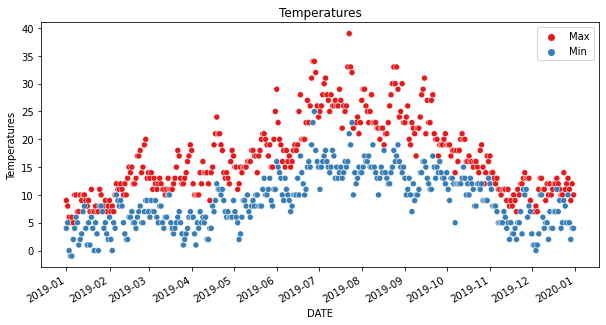

In [ ]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

# Creating figure and one axe
fig, ax = plt.subplots(figsize=(10,5))

# Done via matplotlib.pyplot
# ax.scatter("DATE", "MAX_TEMPERATURE_C", data=df_weather, c="red", label="Max")
# ax.scatter("DATE", "MIN_TEMPERATURE_C", data=df_weather, c="blue", label="Min")

# This matplotlib colormap "Set1" contains "Red" and "Blue"
sns.set_palette("Set1")

# To be done using Seaborn:
sns.scatterplot(x="DATE", y="Temperatures", hue="variable", data=df_minmax)
ax.set_title("Temperatures")

# To rename legend labels, we need to get handles for legend
h, l = ax.get_legend_handles_labels()

# Then use this to set the labels as we want:
ax.legend(h, ["Max", "Min"])

# Following tricks with xticks (rhyme (un)intended)
# are taken from here:
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html

# Major ticks every month
fmt_every_month = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_every_month)

# This autofmt_xdate function does some neat magic with the labels,
# so they're nicely visible. Even better than the "example"
fig.autofmt_xdate()

fig.show()





## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

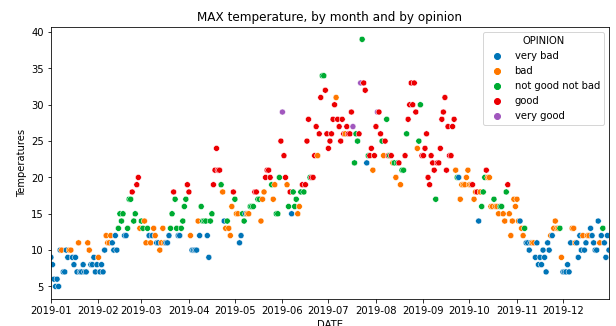

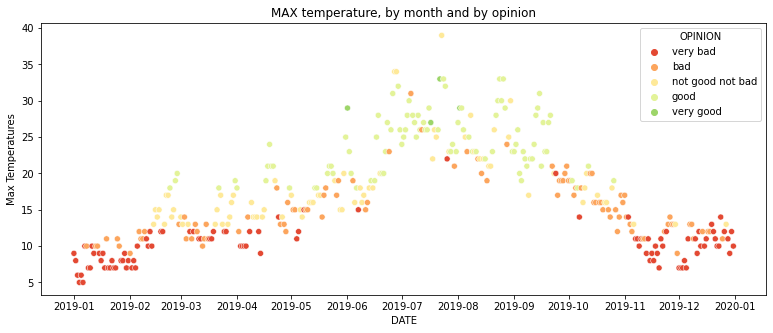

In [ ]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

# This one is really good, you'll see
sns.set_palette("RdYlGn")

fix, ax = plt.subplots(figsize=(13, 5))

ax = sns.scatterplot(x="DATE", y="MAX_TEMPERATURE_C", hue="OPINION", data=df_weather)

# Reference for axis label trick:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_labels_demo.html?highlight=axis%20label

# Setting Y-Axis label
ax.set_ylabel("Max Temperatures")

# Setting every month on X-Axis
ax.xaxis.set_major_locator(fmt_every_month)
ax.set_title("MAX temperature, by month and by opinion")

fig.show()




## Correlation coefficient and heatmap - change the palette and interpretation

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ?

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.



Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)

Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it's logical ?

### Answer

> What does it mean ?

It indicates whether two variables are correlated with each other, i.e. whether they change in same or opposite manner.

> Could you interpret this ?

Yes, I can. It's the matrix of each tuple of variables. You get a value of the correlation coefficient of two variables in the intersection of the their row and column.

> Why the diagonal value is 1 ?

Because variable is always positively correlated with itself.

> And why there is a blank column and a blank row ?

The row and column belongs to "TOTAL_SNOW_MM", which is `0` for all measurements. If you add that to the formula you get exactly `0` for correlation coefficient. It is color-coded to white color, so it looks like blank, but it really isn't.

> Could you find the less correlated columns ?

Yes. The pale ones. E.g.: "DAY" with pretty much anything except itself.

In [ ]:
df_weather["TOTAL_SNOW_MM"].value_counts()

0    365
Name: TOTAL_SNOW_MM, dtype: int64

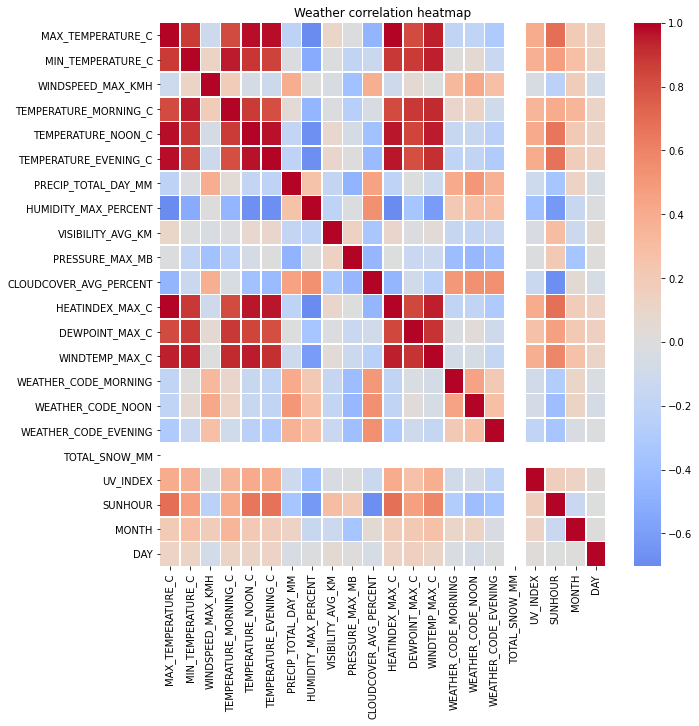

In [ ]:
# It's your turn now :

# This is how to simple calculate correlation matrix
corr = df_weather.corr()

# Initialize figure and axe
fig, ax = plt.subplots(figsize=(10,10))

# Heatmap with centered "coolwarm" palette
sns.heatmap(data=corr, cmap="coolwarm", center=0.0, linewidths=.5)

# Title
ax.set_title("Weather correlation heatmap")

fig.show()



> Try to interpret it : which columns are most correlated with MAX Temperature ?

* MIN_TEMPERATURE_C
* TEMPERATURE_MORNING_C
* TEMPERATURE_NOON_C
* TEMPERATURE_EVENING_C
* HEATINDEX_MAX_C
* DEWPOINT_MAX_C
* WINDTEMP_MAX_C
* HUMIDITY_MAX_PERCENT

> Positively and negatively ?

HUMIDITY_MAX_PERCENT is negatively correlated, the others above mentioned are positively correlated.

> Do you think it's logical ?

Yes, it's quite reasonable.

## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


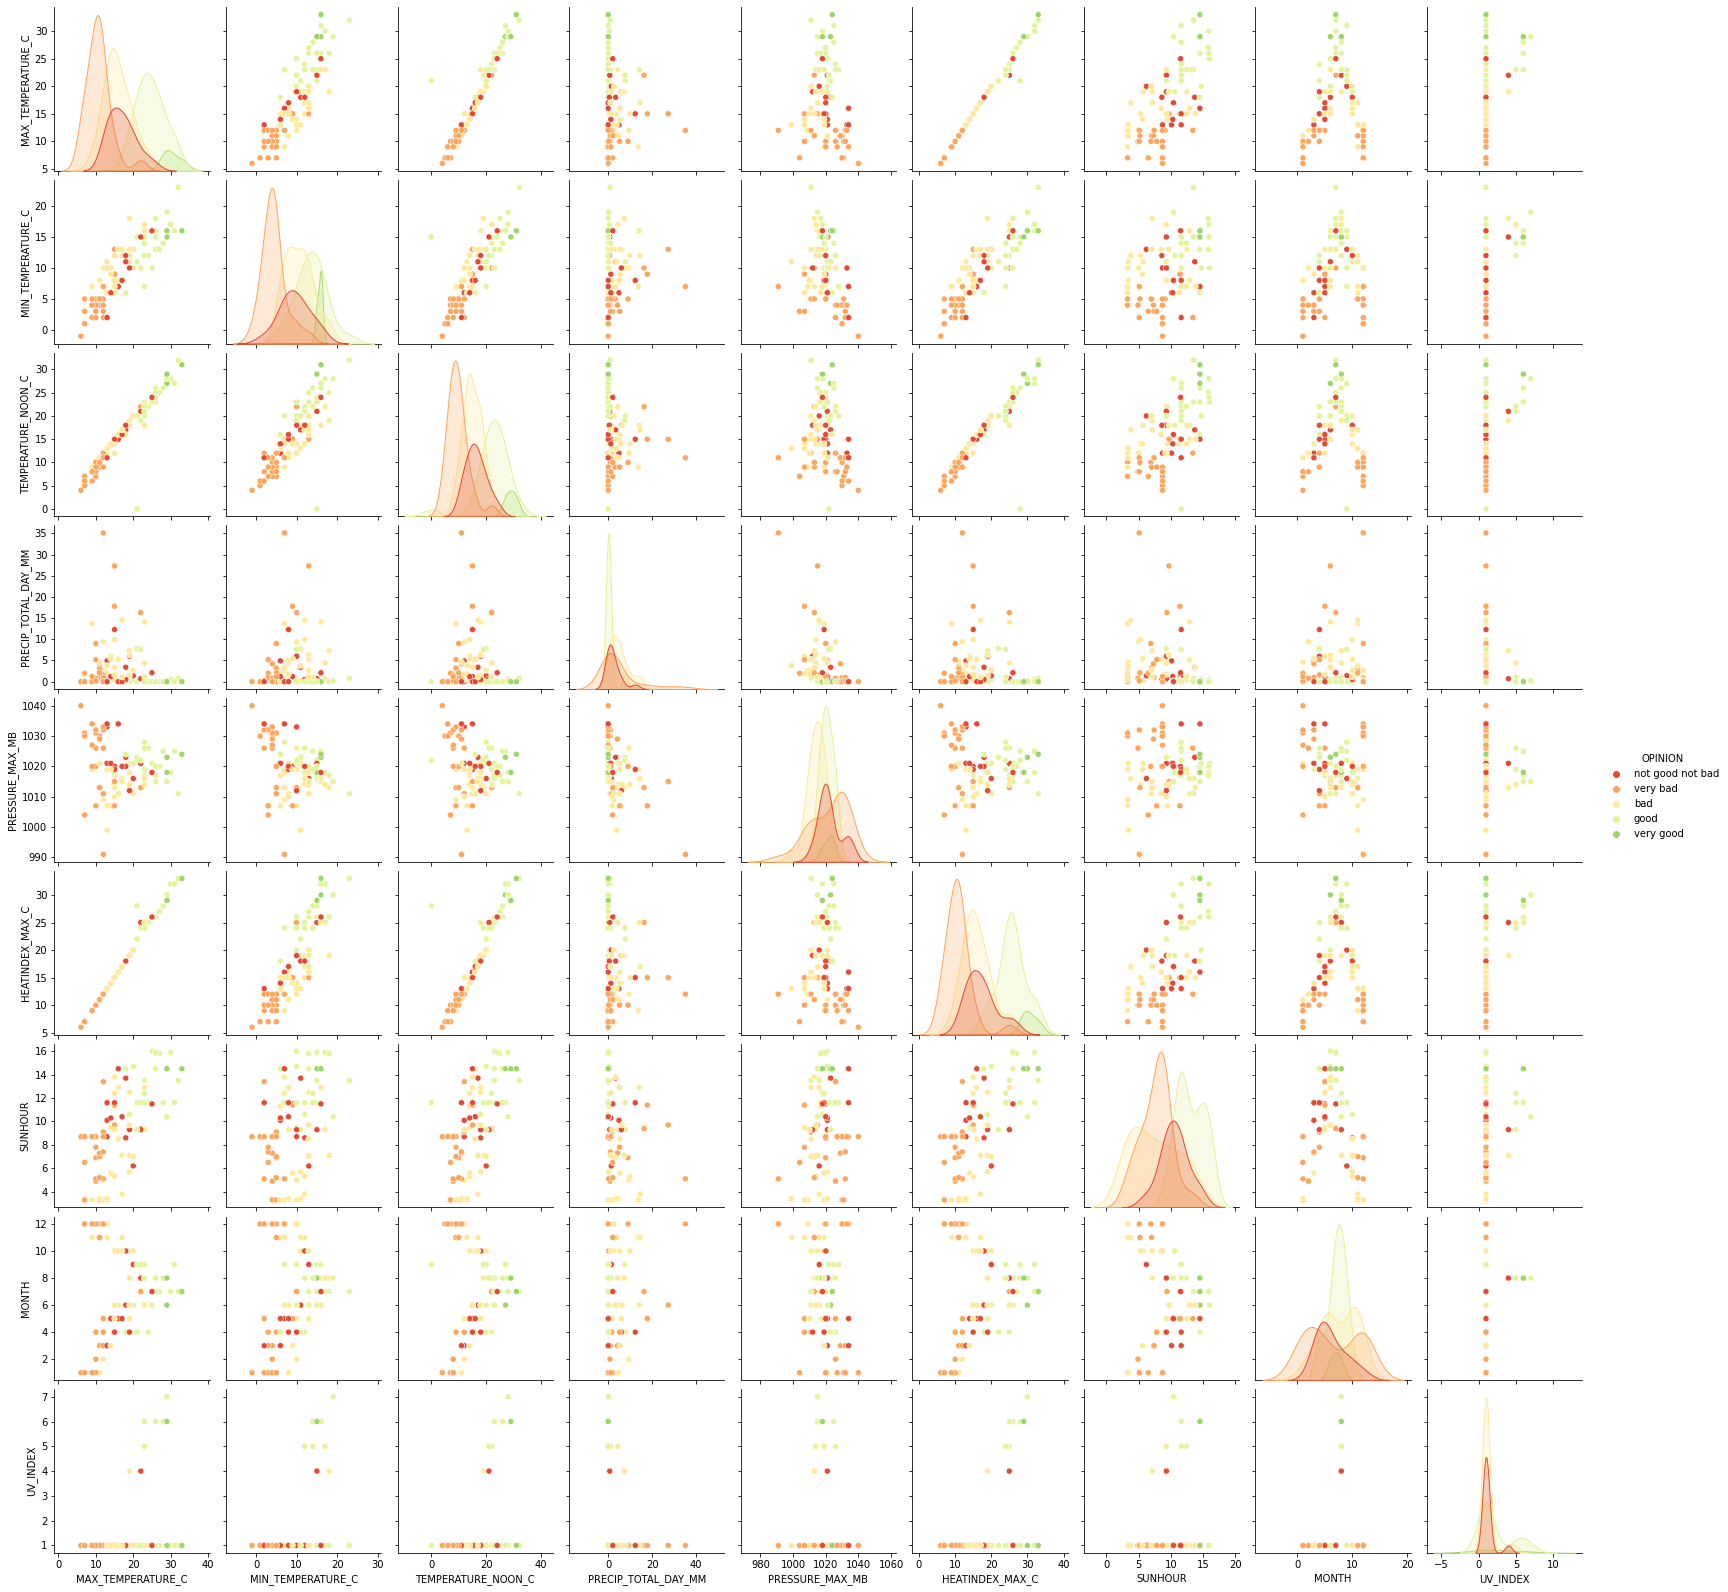

In [ ]:
# It's your turn:

# Create a slice of 10 columns (including the "OPINION" column)
df_slice = df_weather.loc[:,
                          ["MAX_TEMPERATURE_C",
                           "MIN_TEMPERATURE_C",
                           "TEMPERATURE_NOON_C",
                           "PRECIP_TOTAL_DAY_MM",
                           "PRESSURE_MAX_MB",
                           "HEATINDEX_MAX_C",
                           "SUNHOUR",
                           "MONTH",
                           "UV_INDEX",
                           "OPINION"]].sample(90)


sns.pairplot(df_slice, hue="OPINION")
plt.show()
#df_slice

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


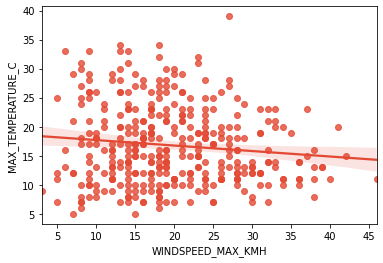

In [ ]:

sns.regplot('WINDSPEED_MAX_KMH', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()


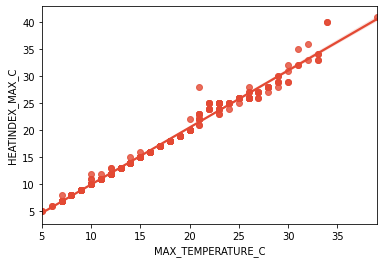

In [ ]:
# Display a regplot with a positive correlation:
sns.regplot(x="MAX_TEMPERATURE_C", y="HEATINDEX_MAX_C", data = df_weather)
plt.show()


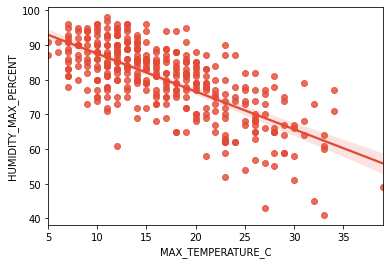

In [ ]:
# Display a regplot with a negative correlation:
sns.regplot(x="MAX_TEMPERATURE_C", y="HUMIDITY_MAX_PERCENT", data = df_weather)
plt.show()

# More and more...
Draw 4 different charts of your choice (you're an analyst, you have to be force of proposal), on the same figure, to represent which season has better weather.

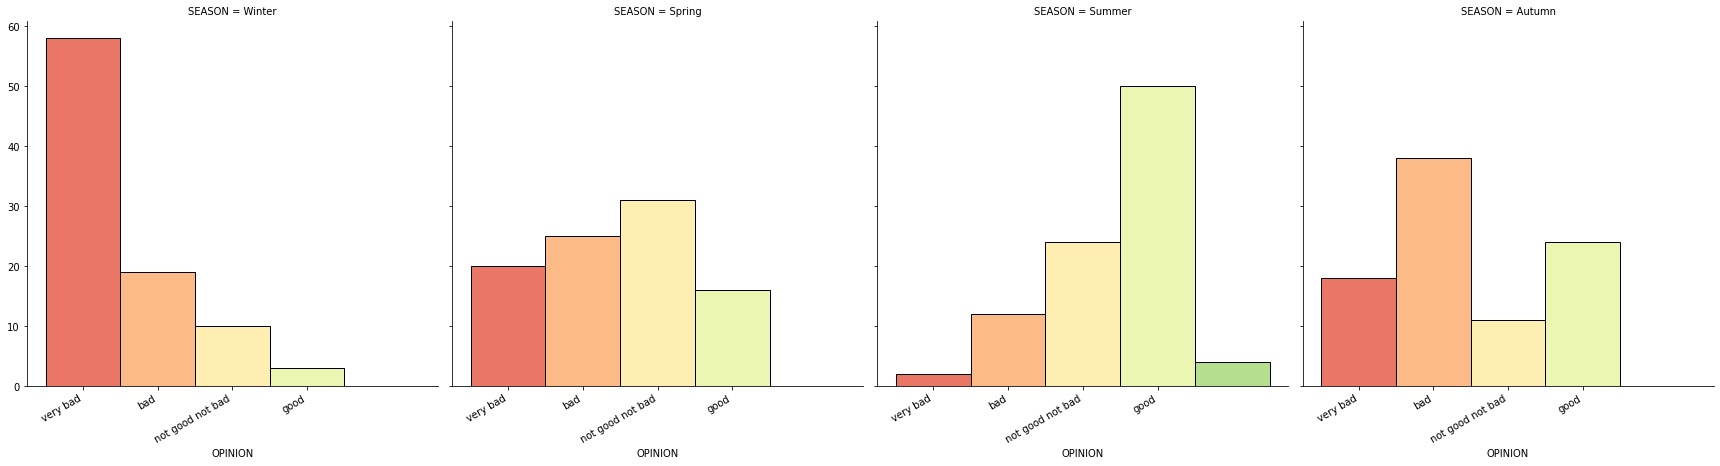

In [ ]:
# Your code here

# Make simple assignment to seasons
df_weather.loc[df_weather["MONTH"].isin([3,4,5]), "SEASON"] = "Spring"
df_weather.loc[df_weather["MONTH"].isin([6,7,8]), "SEASON"] = "Summer"
df_weather.loc[df_weather["MONTH"].isin([9,10,11]), "SEASON"] = "Autumn"
df_weather.loc[df_weather["MONTH"].isin([1,2,12]), "SEASON"] = "Winter"

# Create FacetGrid by season with "Opinion" as hue
g = sns.FacetGrid(df_weather, col="SEASON", hue="OPINION", height=6)

# Plot all opinion histograms
g.map(sns.histplot, "OPINION")


# Tweak the xticks
axs = g.fig.get_axes()
[axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=30, fontdict={"horizontalalignment": "right"}) for i in range(4)]

# Show the thing
plt.show()

# I have no idea what happened to "very good" label o_O







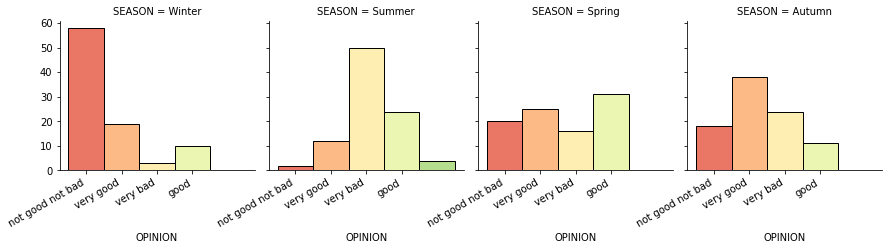

In [28]:
# Trying out sorting for histograms

df_weather.loc[df_weather["MONTH"].isin([3,4,5]), "SEASON"] = "Spring"
df_weather.loc[df_weather["MONTH"].isin([6,7,8]), "SEASON"] = "Summer"
df_weather.loc[df_weather["MONTH"].isin([9,10,11]), "SEASON"] = "Autumn"
df_weather.loc[df_weather["MONTH"].isin([1,2,12]), "SEASON"] = "Winter"

g = sns.FacetGrid(df_weather.sort_values(by='SEASON',ascending=False), col="SEASON", hue="OPINION")

g.map(sns.histplot, "OPINION")

axs = g.fig.get_axes()
[axs[i].set_xticklabels(sorted(list(set(df_weather['OPINION'])),key=len, reverse=True), rotation=30, fontdict={"horizontalalignment": "right"}) for i in range(4)]

plt.show()

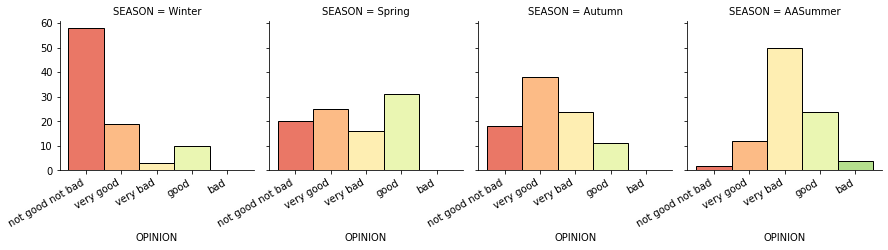

In [30]:
df_weather.loc[df_weather["MONTH"].isin([6,7,8]), "SEASON"] = "AASummer"

g = sns.FacetGrid(df_weather.sort_values(by='SEASON',ascending=False), col="SEASON", hue="OPINION")

g.map(sns.histplot, "OPINION")

axs = g.fig.get_axes()
[axs[i].set_xticklabels(sorted(list(set(df_weather['OPINION'])),key=len, reverse=True), rotation=30, fontdict={"horizontalalignment": "right"}) for i in range(4)]

plt.show()

# Is it summer? It seems appropriate. :) 

Yup.